## 1. 프로그램의 요구사항

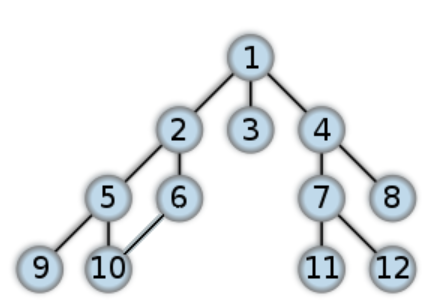

미로찾기 프로그램을 활용하여 DFS와 BFS를 구현하라고 하였다.  
문제에서 주어진것은 파이썬의 트리구조이기에 리스트로 구현이 힘들어서 문제는 딕셔너리로 구현을 하되, 코딩은 큐와 선형큐를 활용하였다.  
1. DFS에에서 중요한점은 스택에 앞으로 가야할 노드를 쌓고 그 이전의 경우에서 다른 갈림길로 간다.(스택에서 마지막을 POP을 한다.)  
2. BFS는 DFS와 반대로 원형큐의 성질에 의해 앞에서 POP을 하기 때문에 수평방향으로 진행을 하게 된다.  

## 2.프로그램 및 모든 코드의 각 라인에 대한 주석

In [7]:
# 트리 형태의 문제를 리스트로 바꾸면 다음과 같다. 인접노드는 1로 아닌 것은 0으로 표현 했다.
map = [['0','1','1','1','0','0','0','0','0','0','0','0'],
       ['1','0','0','0','1','1','0','0','0','0','0','0'],
       ['1','0','0','0','0','0','0','0','0','0','0','0'],
       ['1','0','0','0','0','0','1','1','0','0','0','0'],
       ['0','1','0','0','0','0','0','0','1','1','0','0'],
       ['0','1','0','0','0','0','0','0','0','1','0','0'],
       ['0','0','0','1','0','0','0','0','0','0','1','1'],
       ['0','0','0','1','0','0','0','0','0','0','0','0'],
       ['0','0','0','0','1','0','0','0','0','0','0','0'],
       ['0','0','0','0','1','1','0','0','0','0','0','0'],
       ['0','0','0','0','0','0','1','0','0','0','0','0'],
       ['0','0','0','0','0','0','1','0','0','0','0','0']]
# 리스트의 사이즈는 12 *12 이므로 사이즈는 12이다.
MAZE_SIZE = 12

In [8]:
#스택으로 완벽히 구현하지는 않았지만 LIFO특성을 유의해서 코드를 구현하였다.
def DFS(map):
    stack, path= [],[] # 스택과 경로를 리스트로 만들어 준다.
    start_node= (0,0) # 시작 노드를 설정
    stack.append(start_node) # 스택에 시작 노드를 넣어준다.
    print('DFS: ')
    
    while stack: # 스택이 비워질때 까지 계속 실행한다.
        node = stack.pop() # 스택에서 맨 마지막 노드를 꺼내준다.(그것이 경로가 됨)
        print(node,end='->') # 이동한 경로를 표시 
        if node not in path: #  만약 그 노드가 경로에 없다면
            path.append(node) # 경로에 그 노드를 추가한다.     
            for i in range(MAZE_SIZE): 
                if map[(node[1])][i] in '1':
                    stack.append((node[1],i)) # 그 노드와 인접한 노드들을 스택에 넣어준다.
                else:
                    pass
        print('현재스택: ',stack) # 스택의 내용을 표시

## 출력

In [9]:
DFS(map)

DFS: 
(0, 0)->현재스택:  [(0, 1), (0, 2), (0, 3)]
(0, 3)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 7)]
(3, 7)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (7, 3)]
(7, 3)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (3, 6), (3, 7)]
(3, 7)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (3, 6)]
(3, 6)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (6, 11)]
(6, 11)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (11, 6)]
(11, 6)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (6, 3), (6, 10), (6, 11)]
(6, 11)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (6, 3), (6, 10)]
(6, 10)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (6, 3), (10, 6)]
(10, 6)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (6, 3), (6, 3), (6, 10), (6, 11)]
(6, 11)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3, 0), (6, 3), (6, 10), (6, 3), (6, 3), (6, 10)]
(6, 10)->현재스택:  [(0, 1), (0, 2), (3, 0), (3, 6), (3,

In [10]:
#큐로 완벽히 구현하지는 않았지만 FIFO특성을 유의해서 코드를 구현하였다.
def BFS(map):
    queue, path= [],[] # 큐와 경로를 리스트로 만들어 준다.
    start_node= (0,0) # 시작 노드를 설정
    queue.append(start_node) # 큐에 시작 노드를 넣어준다.
    print('BFS:' )
    
    while queue: # 큐가 비워질때 까지 계속 실행한다.
        node = queue.pop(0) # 큐에서 맨 마지막 노드를 꺼내준다.(그것이 경로가 됨)
        print(node,end='->') # 이동한 경로를 표시    
        if node not in path: #  만약 그 노드가 경로에 없다면
            path.append(node) # 경로에 그 노드를 추가한다.     
            for i in range(MAZE_SIZE): 
                if map[(node[1])][i] in '1':
                    queue.append((node[1],i)) # 그 노드와 인접한 노드들을 큐에 넣어준다.
        
        print('현재큐: ',queue) # 스택의 내용을 표시

## 출력

In [11]:
BFS(map)

BFS:
(0, 0)->현재큐:  [(0, 1), (0, 2), (0, 3)]
(0, 1)->현재큐:  [(0, 2), (0, 3), (1, 0), (1, 4), (1, 5)]
(0, 2)->현재큐:  [(0, 3), (1, 0), (1, 4), (1, 5), (2, 0)]
(0, 3)->현재큐:  [(1, 0), (1, 4), (1, 5), (2, 0), (3, 0), (3, 6), (3, 7)]
(1, 0)->현재큐:  [(1, 4), (1, 5), (2, 0), (3, 0), (3, 6), (3, 7), (0, 1), (0, 2), (0, 3)]
(1, 4)->현재큐:  [(1, 5), (2, 0), (3, 0), (3, 6), (3, 7), (0, 1), (0, 2), (0, 3), (4, 1), (4, 8), (4, 9)]
(1, 5)->현재큐:  [(2, 0), (3, 0), (3, 6), (3, 7), (0, 1), (0, 2), (0, 3), (4, 1), (4, 8), (4, 9), (5, 1), (5, 9)]
(2, 0)->현재큐:  [(3, 0), (3, 6), (3, 7), (0, 1), (0, 2), (0, 3), (4, 1), (4, 8), (4, 9), (5, 1), (5, 9), (0, 1), (0, 2), (0, 3)]
(3, 0)->현재큐:  [(3, 6), (3, 7), (0, 1), (0, 2), (0, 3), (4, 1), (4, 8), (4, 9), (5, 1), (5, 9), (0, 1), (0, 2), (0, 3), (0, 1), (0, 2), (0, 3)]
(3, 6)->현재큐:  [(3, 7), (0, 1), (0, 2), (0, 3), (4, 1), (4, 8), (4, 9), (5, 1), (5, 9), (0, 1), (0, 2), (0, 3), (0, 1), (0, 2), (0, 3), (6, 3), (6, 10), (6, 11)]
(3, 7)->현재큐:  [(0, 1), (0, 2), (0, 3), (4, 